Plot images Function

MNIST Data

In [3]:
#Import Dependencies
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
%matplotlib inline

In [4]:
tf.__version__

'1.3.0'

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot = True)

/Users/midhunpk/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [11]:
len(data.train.labels), len(data.test.labels), len(data.validation.labels)

(55000, 10000, 5000)

In [42]:
data.test.cls = np.argmax(data.test.labels, 1)

Data Dimensions

In [24]:
img_size = 28
img_size_flat = img_size*img_size
img_shape = (img_size, img_size)
num_channels = 1
num_classes = 10

Function for plotting

In [37]:
def plot_images(images, cls_true, cls_pred = None):
    assert len(images) == len(cls_true) ==9
    
    #create fig with 3x3 sub-plots
    
    fig, axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap = 'binary')
        
        if cls_pred is None:
            xlabel = "True: {}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred = {1}".format(cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        
        #Remove axis ticks
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

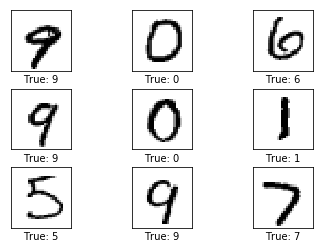

In [40]:
images = data.test.images[9:18]
cls_true = data.test.cls[9:18]
plot_images(images,cls_true = cls_true)

Define model

In [44]:
def random_mini_batches(X, Y, minibatch_size = 64):
    minibatches = []
    m = X.shape[0]
    #Shuffle
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:]
    
    num_complete_minibatches = math.floor(m/minibatch_size)
    for i in range(num_complete_minibatches):
        minibatch_x = shuffled_X[(i*minibatch_size):((i+1)*minibatch_size),:,:,:]
        minibatch_y = shuffled_Y[(i*minibatch_size):((i+1)*minibatch_size),:]
        minibatch = (minibatch_x,minibatch_y)
        minibatches.append(minibatch)
    if m % minibatch_size != 0:
        minibatch_x = shuffled_X[(num_complete_minibatches*minibatch_size):m,:,:,:]
        minibatch_y = shuffled_Y[(num_complete_minibatches*minibatch_size):m,:]
        minibatch = (minibatch_x,minibatch_y)
        minibatches.append(minibatch)
    return minibatches

In [43]:
def creaete_placeholder(height, Width, channels, classes):
    X = tf.placeholder(tf.float32, [None, height, width, channels])
    Y = tf.placeholder(tf.float32, [None, classes])
    return X, Y

In [45]:
 def initialize_parameters():
        W1 = tf.get_variable("W1", [4,4,3,3], initializer = tf.contrib.layers.xavier_initializer())
        W2 = tf.get_variable("W2", [4,4,3,8], initializer = tf.contrib.layers.xavier_initializer())
        parameters = {"W1" : W1, "W2": W2}
        return parameters

In [ ]:
def forward(X, parameters):
    Z1 = tf.nn.conv2d(X, W1, strides = [1,1,1,1], padding = 'SAME')
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1, )
    Z2 = tf.